<p><img alt="Colaboratory logo" width="60px" height="50px" src="http://martingramatica.me/img/myNameBlack.png" align="left" hspace="10px" vspace="0px"></p>

<h1>COVID-19 En Argentina</h1>

Lamentablemente el gobierno argentino no ofrece datos completos en tiempo real sobre la situación de la pandemia en nuestro país.

Por eso, hace unos días me propuse generar un registro en csv con los casos día por día, provincia por provincia. Para esto, utilicé los reportes diarios emitidos por el Ministerio de Salud de la nación y los periódicos más importantes para cubrir las incosistencias o falta de información de los reportes.

Para completar, hice <strong>sencillos gráficos</strong> consumiendo esta información, y la infromación a nivel global ofrecida en https://github.com/CSSEGISandData

En este caso analizo el número de fallecidos en Argentina.

Te invito a que participes, ya sea actualizando o corrigiendo datos, aprotando nuevos análisis de la información o simplemente con sugerencias e ideas.

<strong>Gracias!!!</strong>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

currentDirectory = os.getcwd()

In [2]:
confirmed_df = pd.read_csv(currentDirectory + "\\data\\time_series_19-covid-Deaths.csv")

del confirmed_df['Lat']
del confirmed_df['Long']
del confirmed_df['Country/Region']

confirmed_df = confirmed_df.set_index('Province/State')

confirmed_df.columns = pd.to_datetime(confirmed_df.columns)

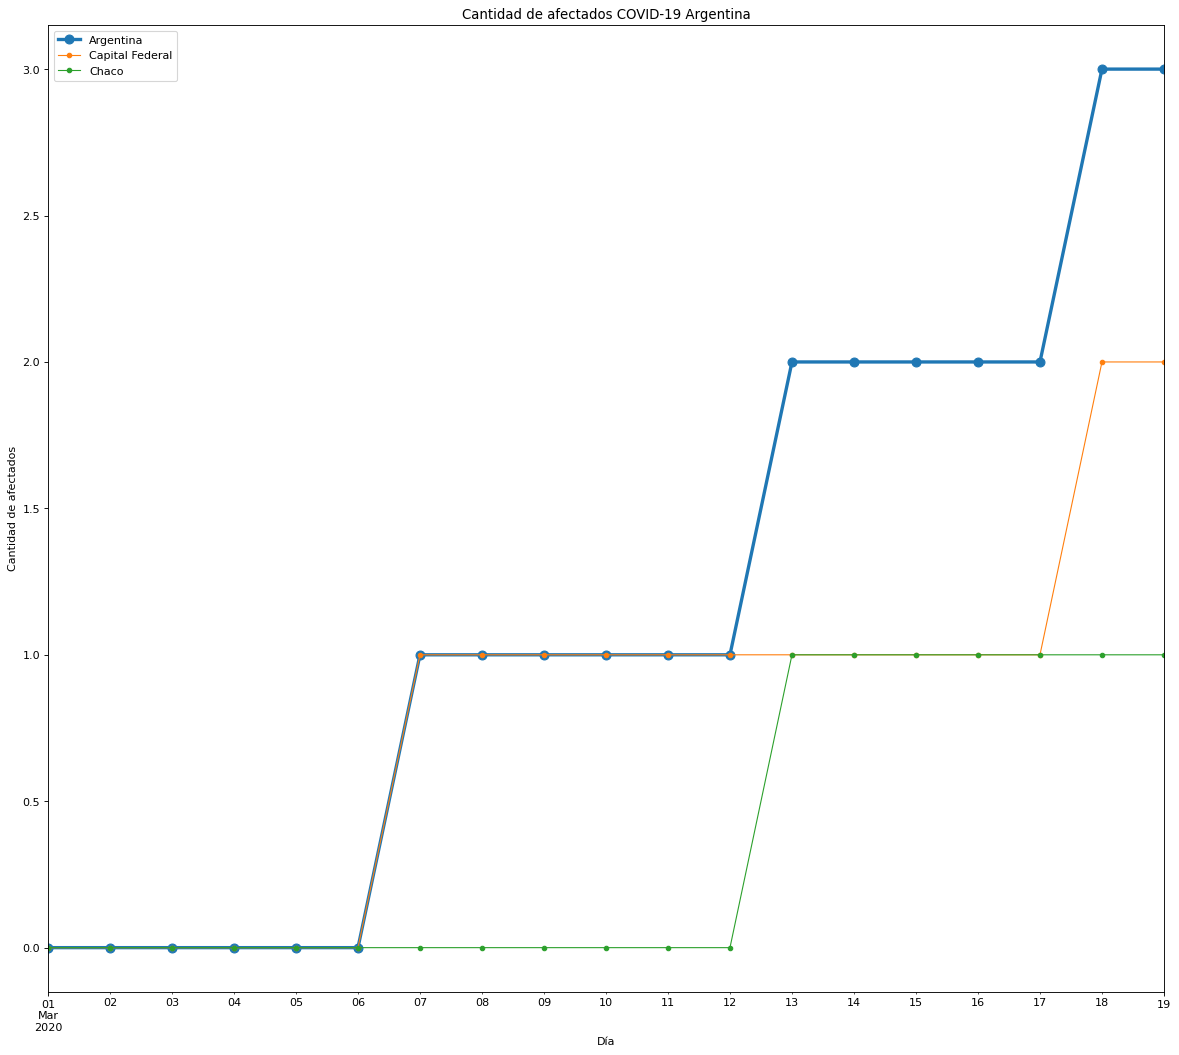

In [3]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

tot_arg = confirmed_df.sum(axis=0)

tot_arg.plot.line(marker="o", linewidth=3, markersize=8)

legend = ['Argentina']

for idx in confirmed_df.index:
    if(confirmed_df.loc[idx,:].sum() > 0):
        confirmed_df.loc[idx,:].plot.line(marker="o", linewidth=1, markersize=4)
        legend.append(idx)

plt.title('Cantidad de afectados COVID-19 Argentina')
plt.legend(legend)

plt.xlabel('Día')
plt.ylabel('Cantidad de afectados')

plt.show()